### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt

### Data gathering

#### Twitter archive data

In [2]:
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
#twitter_archive.head()

#### Image prediction data

In [3]:
# To download and saving data in .tsv using Requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
open('image_predictions.tsv', 'wb').write(r.content)

335079

In [4]:
# Saving image_predictions.tsv file in dataframe

image_predictions=pd.read_csv('image_predictions.tsv', sep = '\t')


#### Creation of tweet_json.txt from twitter API 

In [5]:
#Downloading data using Tweepy ( Twitter API)


#Set access key
consumer_key = 'PyH5qSh3jsNKBdN3wPXb5JgQ4'
consumer_secret = 'oJCwd3pyg0rICUs56Mt0njvRv9WKkgrvETDFlDGrgYpwAKZpkv'
access_token = '137307352-2P3qcqlyz4BFDugyxJ9Wr6uO3R46Si2uMliUsnD5'
access_secret = 'ck8jhMvZFLD38sC4Nn9BiFQL775aZKKt8ZkWaCUtCsrp1'

#set authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#create API object
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

tweet_ids = twitter_archive.tweet_id.values

#looping through all the tweet_ids and writing it in tweet_json.txt
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError:
            print('Error: No tweet available')


Error: No tweet available
Error: No tweet available
Error: No tweet available
Error: No tweet available
Error: No tweet available
Error: No tweet available
Error: No tweet available
Error: No tweet available
Error: No tweet available
Error: No tweet available
Error: No tweet available
Error: No tweet available
Error: No tweet available
Error: No tweet available
Error: No tweet available
Error: No tweet available
Error: No tweet available
Rate limit reached. Sleeping for: 700
Error: No tweet available
Error: No tweet available
Rate limit reached. Sleeping for: 711


#### Creation of a dataframe by extracting relevant information from tweet_json.txt

In [5]:

# Empty Dataframe 
tweets_data = pd.DataFrame(columns=['tweet_id','favourites_count','retweet_count'])

with open('tweet_json.txt', 'r') as outfile:
    for line in outfile:
        data=json.loads(line)
        tweet_id=data['id']
        tweet_fav=data["favorite_count"]
        tweet_rt=data["retweet_count"]
        #tweet_rt_status=data["retweeted"]
        #print(tweet_id)
        tweets_data=tweets_data.append({'tweet_id':tweet_id,'favourites_count':tweet_fav,'retweet_count':tweet_rt},ignore_index=True)
        

### Data Assesing:

#### Assesing Twitter Archive dataset

In [6]:
twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
#Checking the structure
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
#checking duplicate tweet id
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [9]:
#Finding tweets having retweeted_status_id not equal to "NaN"
twitter_archive.query('retweeted_status_id!="NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


#### Assesing Twitter Image Prediction dataset

In [10]:
image_predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Checking if any of the probability is greater than 1 or less than 0

In [12]:
image_predictions.query('p1_conf > 1 | p1_conf < 0').shape[0]

0

In [13]:
image_predictions.query('p2_conf > 1 | p2_conf < 0').shape[0]

0

In [14]:
image_predictions.query('p3_conf > 1 | p3_conf < 0').shape[0]

0

In [15]:
#checking duplicate tweet id
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Assesing Twitter favourite count and retweet count dataset

In [16]:
tweets_data.head()

,tweet_id,favourites_count,retweet_count
0,892420643555336193,37474,8162
1,892177421306343426,32209,6040
2,891815181378084864,24279,3998
3,891689557279858688,40796,8314
4,891327558926688256,39013,9011


In [17]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id            2337 non-null object
favourites_count    2337 non-null object
retweet_count       2337 non-null object
dtypes: object(3)
memory usage: 54.9+ KB


#### Quality :
  
  __Twitter_archive__ table :
   
-  in_reply_to_status_id contains missing value
-  in_reply_to_user_id contains missing value
-                   timestamp column must be a datetime object
- There are `181` number of cases of retweet,such occurrence needs to be removed from the dataset
- Since we are removing retweets hence `retweeted_status_user_id` and `retweeted_status_timestamp` columns  may be omitted
- After cleaning all the retweets columns we may now remove the `retweeted_status_id` column
- Text column doesn't have full information
- `expanded_urls` column may be omitted as source is enough to find the root of the tweet



__image_predictions__ table :

- `p2`	`p2_conf`	`p2_dog`	`p3`	`p3_conf`	`p3_dog` these columns may be omitted as we are more interested in first predictions only
- `favourites_count` and `retweet_count` must be integer data type
- Delete entries where it does not resemble a dog.This can be achieved by checking count of False from p1_dog column.
- Once we have gathered information for all species of dog kind we may now remove the p1_dog column.


__Tweets_data__ table :

- convert `tweets_id` ,`favourites_count` and `retweet_count` as integer datatype




#### Tidiness :

__archive__ table :

- `doggo	floofer	pupper	puppo` may be regarded as a single column `dog_type`
- Merge `twitter_archive`,`image_predictions` and `tweets_data` table

### Data Cleaning:

#### Create copies of all the dataset

In [18]:
# create _clean pandas dataframe using copy() method
twitter_archive_clean=twitter_archive.copy()
image_predictions_clean=image_predictions.copy()
tweets_data_clean=tweets_data.copy()

## Twitter_Archive Table





#### Define

in_reply_to_status_id and in_reply_to_user_id columns need to be omitted from archive table


#### Code

In [19]:
twitter_archive_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)

#### Test

In [20]:
#output must return zero '0'
(twitter_archive_clean.columns=="in_reply_to_status_id | in_reply_to_user_id").sum()

0

#### Define

Convert timestamp column as a datetime object in archive table

#### Code


In [21]:
twitter_archive_clean['timestamp']=pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [22]:
twitter_archive_clean['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

#### Define



Retweet rows need to be removed from archive table


#### Code

In [23]:
twitter_archive_clean=twitter_archive_clean.query('retweeted_status_id=="NaN"')

In [24]:
# resetting index
twitter_archive_clean.reset_index(inplace=True,drop=True)

#### Test

In [25]:
#checking the nos of entries having retweeted_status_id not like "NaN",Result must be zero '0'
twitter_archive_clean.query('retweeted_status_id!="NaN"').shape[0]

0

#### Define


Drop `retweeted_status_user_id` , `retweeted_status_timestamp` and `retweeted_status_id` columns


#### Code

In [26]:
twitter_archive_clean.drop(columns=['retweeted_status_user_id','retweeted_status_timestamp','retweeted_status_id'],axis=1,inplace=True)

#### Test

In [27]:
#result must return zero '0'
(twitter_archive_clean.columns=="retweeted_status_user_id | retweeted_status_timestamp | retweeted_status_id").sum()

0

#### Define

Text column needs to have full view of texts


#### Code

In [28]:
pd.set_option('display.max_colwidth',-1)

#### Test

In [29]:
twitter_archive_clean.text.head()

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                     
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2    This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                 
3    This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                           
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Name: text, dtype: object

#### Define

Delete expanded_urls column

#### Code

In [30]:
twitter_archive_clean.drop(columns='expanded_urls',axis=1,inplace=True)

#### Test

In [31]:
#output should return '0'
(twitter_archive_clean.columns=='expanded_urls').sum()

0

#### Define

Associate all the dog stages in a single column and remove respective dog stages columns

#### Code

In [32]:
#create new column 'dog_stage' with initial entry as 'None'
twitter_archive_clean['dog_stage']="None"

# for loop to feed values
for i in range(twitter_archive_clean.shape[0]):
    if (twitter_archive_clean.loc[i,'doggo']!='None'):
        twitter_archive_clean.loc[i,'dog_stage']='doggo'
    elif (twitter_archive_clean.loc[i,'floofer']!='None'):
        twitter_archive_clean.loc[i,'dog_stage']='floofer'
    elif (twitter_archive_clean.loc[i,'pupper']!='None'):
        twitter_archive_clean.loc[i,'dog_stage']='pupper'
    elif (twitter_archive_clean.loc[i,'puppo']!='None'):
        twitter_archive_clean.loc[i,'dog_stage']='puppo'

In [33]:
#remove individual columns 

twitter_archive_clean.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

#### Test

In [34]:
list(twitter_archive_clean.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage']

## Image_Predictions Table


#### Define

`p2`	`p2_conf`	`p2_dog`	`p3`	`p3_conf`	`p3_dog` these columns may be omitted as we are more interested in first predictions only


#### Code


In [35]:
image_predictions_clean.drop(columns=['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1,inplace=True)

#### Test

In [36]:
#result must return zero '0'
(image_predictions_clean.columns=="p2|p2_conf|p2_dog|p3|p3_conf|p3_dog").sum()

0

#### Define

Delete entries where it does not resemble a dog.This can be achieved by checking count of False from p1_dog column.


#### Code

In [37]:
image_predictions_clean=image_predictions_clean.query('p1_dog==True')

In [38]:
#resetting index
image_predictions_clean.reset_index(inplace=True,drop=True)

#### Test


In [39]:
#output must return zero '0'
image_predictions_clean.query('p1_dog!=True').shape[0]

0

#### Define

Remove the 'p1_dog' column

#### Code

In [40]:
image_predictions_clean.drop(columns='p1_dog',inplace=True)

## Tweets_data Table

#### Define

Convert tweets_id ,favourites_count and retweet_count as integer datatype

#### Code


In [41]:
tweets_data_clean['tweet_id']=tweets_data_clean['tweet_id'].astype('int')
tweets_data_clean['favourites_count']=tweets_data_clean['favourites_count'].astype('int')
tweets_data_clean['retweet_count']=tweets_data_clean['retweet_count'].astype('int')

#### Test

In [42]:
tweets_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id            2337 non-null int64
favourites_count    2337 non-null int64
retweet_count       2337 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


### Merging data

In [43]:
df_master=twitter_archive_clean.merge(image_predictions_clean,how='inner',on='tweet_id')

In [44]:
df_master_final=df_master.merge(tweets_data_clean,how='inner',on='tweet_id')

##### Saving all the cleaned dataframes(including final merge) into .csv files

In [45]:
df_master_final.to_csv('df_master_final.csv')
twitter_archive_clean.to_csv('twitter_archive_clean.csv')
image_predictions_clean.to_csv('image_predictions_clean.csv')
tweets_data_clean.to_csv('tweets_data_clean.csv')

## Analysis and Insights

In [46]:
#checking the master dataframe
df_master_final.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,favourites_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,32209,6040
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,24279,3998
2,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,39013,9011
3,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,19609,2990
4,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,11451,1984


#### Most Favoured Dog Stages

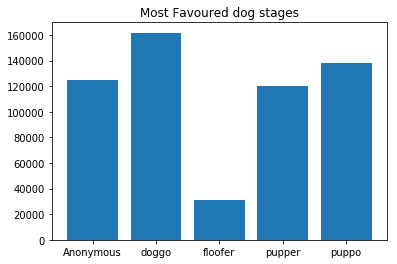

In [47]:
#slicing dataframe based on 
df_stage=df_master_final.groupby(['dog_stage'],as_index=False)['favourites_count'].max().sort_values(by='favourites_count',ascending=False)
df_stage.replace('None','Anonymous',inplace=True)
plt.bar(df_stage.dog_stage,df_stage.favourites_count)
plt.title('Most Favoured dog stages')
plt.savefig('most_fav_dog_stg.png');
plt.show()


#### Insights

1. As per the pie diagram it can be observerd that `doggo` is the most favoured dog stages throughout the time span.
2. `floofer` is the least favoured dog stages.


#### Maximum Retweeted Post

The following row describes the post which has been retweeted maximum number of times.

In [48]:
#finding the max retweet number
t=df_master_final.retweet_count.max()
#visualize the entire row corresponding to the maximum retweet
df_master_final[df_master_final['retweet_count']==t]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,favourites_count,retweet_count
614,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,Labrador_retriever,0.825333,161815,82232


#### Creation of Ratio column

In [49]:
# create Ratio column by dividing rating_numerator with rating_denominator
p=lambda a,b: a/b
df_master_final['Ratio']=p(np.array(df_master_final.rating_numerator),np.array(df_master_final.rating_denominator))




#### Top 5 most rated dog breed

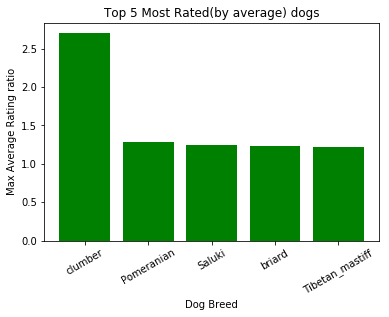

In [50]:
#slicing dataframe based on average rating
df=df_master_final.groupby(['p1'],as_index=False)['Ratio'].mean().sort_values(by='Ratio',ascending=False)
df1=df.head(5)
index=np.arange(df1.shape[0])
bar_width=0.25
plt.bar(index,df1.Ratio,align='center',color='g')
plt.xticks(index,df1.p1,fontsize=10,rotation=30)
plt.title('Top 5 Most Rated(by average) dogs')
plt.xlabel('Dog Breed')
plt.ylabel('Max Average Rating ratio')
# Get current size of the figure
fig_size = plt.rcParams["figure.figsize"] 
# Set figure width and height 
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('Top5_most_average_rated.png',bbox='tight');
plt.show()


#### Insights:

1. Given the above figure `dumber` is the most rated dog.
2. There is a significant difference between the most rated dog with respect to the rests.

#### Trend in the favourites count with respect to each dog stage


In [51]:
#Creation of 'year_month' coulumn by extratcing year and  month from the timestamp column
df_master_final['Year_Month']=df_master_final['timestamp'].dt.to_period('M')
# Method to visualize data
def dog_stage_fav(stage):
    #slicing the dataframe based on the called group
    df_1=df_master_final.query('dog_stage=="{}"'.format(stage))[['favourites_count','Year_Month']].groupby(['Year_Month'],as_index=False)['favourites_count'].sum().sort_values(by='Year_Month')
    df_1.reset_index(inplace=True,drop=True)
    x=len(df_1.Year_Month)
    plt.plot(np.arange(x),df_1.favourites_count)
    plt.xticks(np.arange(x),df_1.Year_Month,fontsize=10,rotation=30)
    plt.xlabel('Year_Month')
    plt.ylabel('favourites_count')
    plt.title('Trend in favourites count for dog stage : {}'.format(stage))
    #saving the image
    plt.savefig('Trend in favourites count for {}.png'.format(stage))
    plt.show()

#### Trend analysis for pupper

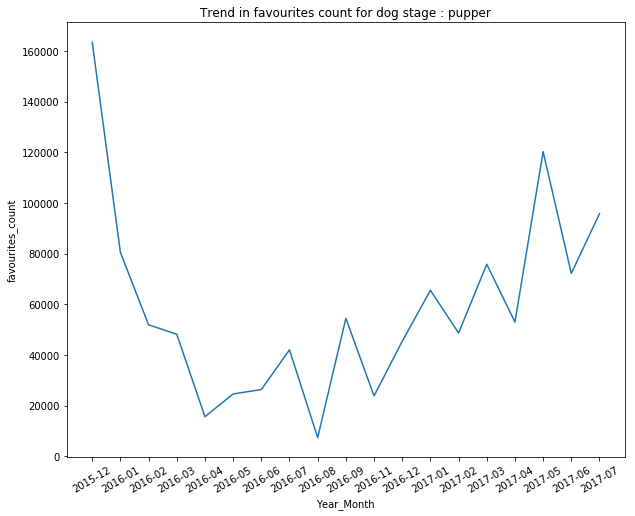

In [52]:
 dog_stage_fav('pupper')

#### Insights :

1. Pupper was favoured most in December 2015
2. There was a rapid fall of favourites after December 2015
3. The existence of most of the months in X-axis suggests pupper is the most popular dog stage

#### Trend analysis for Doggo

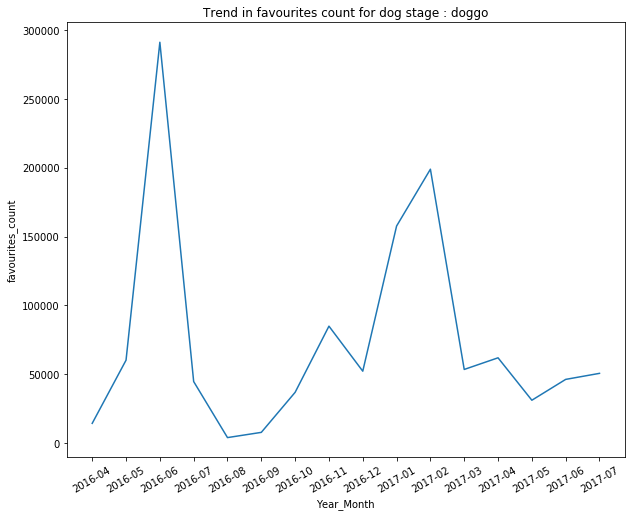

In [53]:
dog_stage_fav('doggo')

#### Insights:

1. Here we come to see the existence of almost all the months suggesting this dog stage has been a good choice for all.
2. Overall trend shows two peaks representing highest favourite counts

#### Trend analysis for floofer

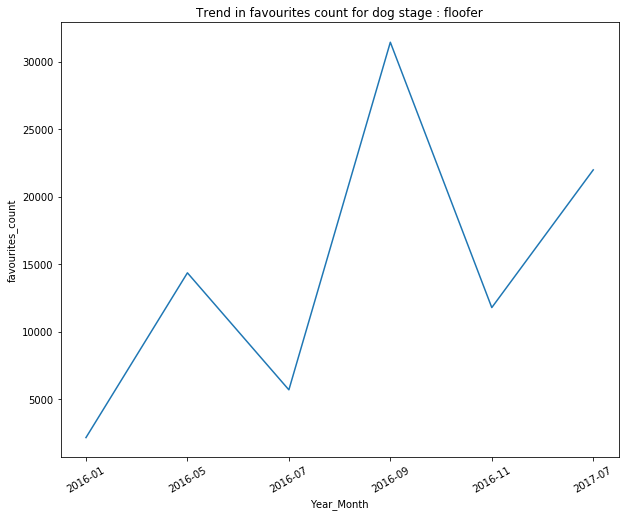

In [54]:
dog_stage_fav('floofer')

#### Insights:

1. Less number of year-month sugeests this dog stage is not a consistent favour to humans.


#### Trend analysis for puppo

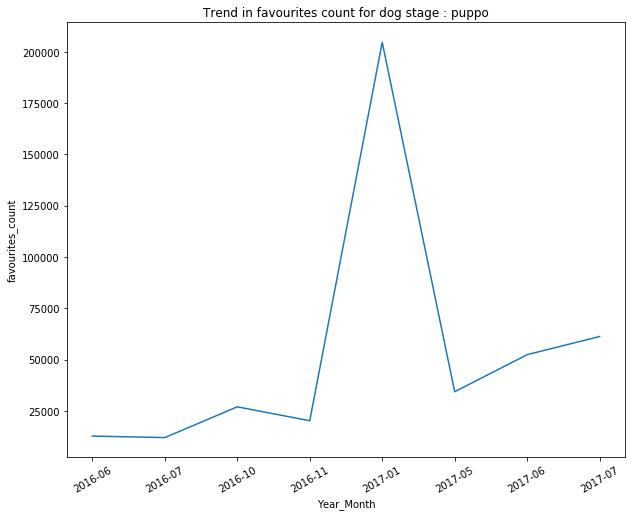

In [55]:
dog_stage_fav('puppo')

#### Insights :

1. This dog stage was less likeable to beings until January 2017 when it took the maximum increase of favourites count.

#### Top 5 Most favoured dog breed

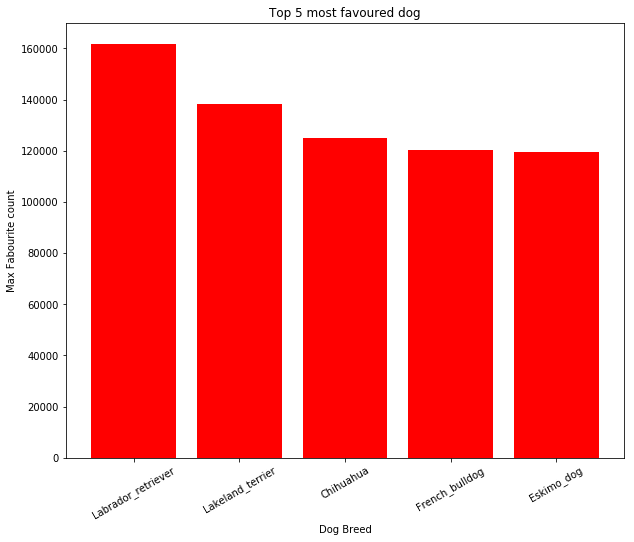

In [57]:
df=df_master_final.groupby(['p1'],as_index=False)['favourites_count'].max().sort_values(by='favourites_count',ascending=False)
df1=df.head(5)
index=np.arange(df1.shape[0])
bar_width=0.25
plt.bar(index,df1.favourites_count,align='center',color='r')
plt.xticks(index,df1.p1,fontsize=10,rotation=30)
plt.title('Top 5 most favoured dog')
plt.xlabel('Dog Breed')
plt.ylabel('Max Fabourite count')
# Get current size of the figure
fig_size = plt.rcParams["figure.figsize"] 
    # Set figure width and height 
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.savefig('top5_most_fav.png',bbox='tight');
plt.show();


#### Insights:

1. Labrador_Retriever is the most favoured dog breed.
2. While the topper and runner up has a significant favourite count difference, rests are having a minimal difference.